## 1. Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK. https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization. *

In [31]:
import nltk
import pandas as pd
nltk.download('stopwords')
sw = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olesiamukha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [55]:
#loading the paradise file from the gutenberg library
paradise = nltk.corpus.gutenberg.words("milton-paradise.txt")
type(paradise)

nltk.corpus.reader.util.StreamBackedCorpusView

In [60]:
my_lines_list=[]
for line in paradise:
    my_lines_list.append(line)
print(my_lines_list[:100]) #printing just the first 100 because the whole text is huge

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']', 'Book', 'I', 'Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if']


In [59]:
#turning word into all lowercase and removing the punctuation
lower_list = [w.lower() for w in my_lines_list if w.isalpha()]
print(lower_list[:100])  #printing just the first 100 because the whole text is huge

['paradise', 'lost', 'by', 'john', 'milton', 'book', 'i', 'of', 'man', 's', 'first', 'disobedience', 'and', 'the', 'fruit', 'of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'brought', 'death', 'into', 'the', 'world', 'and', 'all', 'our', 'woe', 'with', 'loss', 'of', 'eden', 'till', 'one', 'greater', 'man', 'restore', 'us', 'and', 'regain', 'the', 'blissful', 'seat', 'sing', 'heavenly', 'muse', 'that', 'on', 'the', 'secret', 'top', 'of', 'oreb', 'or', 'of', 'sinai', 'didst', 'inspire', 'that', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'in', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'rose', 'out', 'of', 'chaos', 'or', 'if', 'sion', 'hill', 'delight', 'thee', 'more', 'and', 'siloa', 's', 'brook', 'that', 'flowed', 'fast', 'by', 'the', 'oracle', 'of', 'god']


In [61]:
#stemming words
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language = "english")
    

stemmed_list = [stemmer.stem(w) for w in lower_list if w.lower() not in sw]
print(stemmed_list[:100]) #printing just the first 100 because the whole text is huge

['paradis', 'lost', 'john', 'milton', 'book', 'man', 'first', 'disobedi', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'tast', 'brought', 'death', 'world', 'woe', 'loss', 'eden', 'till', 'one', 'greater', 'man', 'restor', 'us', 'regain', 'bliss', 'seat', 'sing', 'heaven', 'muse', 'secret', 'top', 'oreb', 'sinai', 'didst', 'inspir', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'begin', 'heaven', 'earth', 'rose', 'chao', 'sion', 'hill', 'delight', 'thee', 'siloa', 'brook', 'flow', 'fast', 'oracl', 'god', 'thenc', 'invok', 'thi', 'aid', 'adventur', 'song', 'middl', 'flight', 'intend', 'soar', 'th', 'aonian', 'mount', 'pursu', 'thing', 'unattempt', 'yet', 'prose', 'rhyme', 'chiefli', 'thou', 'spirit', 'dost', 'prefer', 'templ', 'th', 'upright', 'heart', 'pure', 'instruct', 'thou', 'know', 'st', 'thou', 'first', 'wast', 'present', 'mighti', 'wing', 'outspread', 'dove', 'like']


I choose **lemmatization** because we're looking for the meaningful words as the outcome and lemmatization process looks at the word in context. And lemmatization process considers the context and converts the word to a "meaningful base form".

In [62]:
#lematizing words and removing the stop words
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

lematized_list = [lemmatizer.lemmatize(w) for w in lower_list if w.lower() not in sw]
print(lematized_list[:100]) #printing just the first 100 because the whole text is huge

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/olesiamukha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['paradise', 'lost', 'john', 'milton', 'book', 'man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'brought', 'death', 'world', 'woe', 'loss', 'eden', 'till', 'one', 'greater', 'man', 'restore', 'u', 'regain', 'blissful', 'seat', 'sing', 'heavenly', 'muse', 'secret', 'top', 'oreb', 'sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heaven', 'earth', 'rose', 'chaos', 'sion', 'hill', 'delight', 'thee', 'siloa', 'brook', 'flowed', 'fast', 'oracle', 'god', 'thence', 'invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'th', 'aonian', 'mount', 'pursues', 'thing', 'unattempted', 'yet', 'prose', 'rhyme', 'chiefly', 'thou', 'spirit', 'dost', 'prefer', 'temple', 'th', 'upright', 'heart', 'pure', 'instruct', 'thou', 'know', 'st', 'thou', 'first', 'wast', 'present', 'mighty', 'wing', 'outspread', 'dove', 'like']


In [24]:
#for w in words_list:
    #stemmed_list=[]
    #stemmed = stemmer.stem(w)
    #stemmed_list.append(stemmed)
    #print(stemmed_list)

In [25]:
#d = dict()
#uniqWords = sorted(set(lematized_list)) #remove duplicate words and sort
#for word in uniqWords:
    #word_count=lematized_list.count(word)
    #print(word, ':',word_count)

In [26]:
#counting the each word in the lematized list and saving the result into a dictionary
d=dict()
for word in lematized_list:
    if word in d:
        # Increment count of word by 1
        d[word] = d[word] + 1
    else:
        # Add the word to dictionary with count 1
        d[word] = 1

In [67]:
list(d.items())[:100] #printing just the first 100 because the whole text is huge

[('paradise', 55),
 ('lost', 58),
 ('john', 2),
 ('milton', 1),
 ('book', 15),
 ('man', 176),
 ('first', 175),
 ('disobedience', 6),
 ('fruit', 81),
 ('forbidden', 11),
 ('tree', 77),
 ('whose', 109),
 ('mortal', 33),
 ('taste', 52),
 ('brought', 36),
 ('death', 127),
 ('world', 119),
 ('woe', 37),
 ('loss', 20),
 ('eden', 26),
 ('till', 120),
 ('one', 142),
 ('greater', 15),
 ('restore', 3),
 ('u', 187),
 ('regain', 4),
 ('blissful', 7),
 ('seat', 55),
 ('sing', 9),
 ('heavenly', 49),
 ('muse', 5),
 ('secret', 21),
 ('top', 25),
 ('oreb', 3),
 ('sinai', 2),
 ('didst', 21),
 ('inspire', 1),
 ('shepherd', 5),
 ('taught', 18),
 ('chosen', 4),
 ('seed', 30),
 ('beginning', 5),
 ('heaven', 436),
 ('earth', 217),
 ('rose', 38),
 ('chaos', 25),
 ('sion', 6),
 ('hill', 66),
 ('delight', 39),
 ('thee', 358),
 ('siloa', 1),
 ('brook', 8),
 ('flowed', 7),
 ('fast', 27),
 ('oracle', 2),
 ('god', 316),
 ('thence', 53),
 ('invoke', 2),
 ('thy', 414),
 ('aid', 21),
 ('adventurous', 5),
 ('song', 28)

In [28]:
type(d)

dict

In [32]:
#creating a dataframe from the dictionary with the word count
words = pd.DataFrame(d.items(), columns=['Word', 'Count'])

In [33]:
#sorting the dataframe by the word count to see the top 20 words
sorted_df = words.sort_values(by=["Count"], ascending=False)

In [34]:
#selecting top20 words
top_20=sorted_df.head(20)

In [68]:
top_20

,Word,Count
42,heaven,436
76,thou,432
58,thy,414
49,thee,358
308,thus,318
55,god,316
376,shall,283
72,yet,228
207,though,217
43,earth,217


array([[<AxesSubplot:title={'center':'Count'}>]], dtype=object)

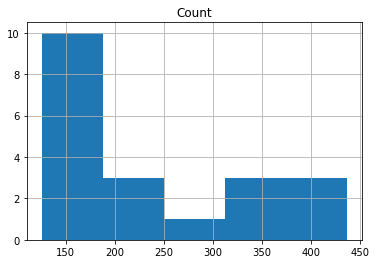

In [36]:
#building the histogram from the top 20 words
top_20.hist(bins=5)

<AxesSubplot:xlabel='Word'>

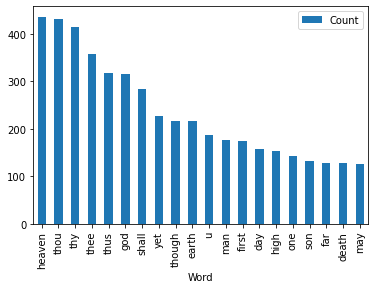

In [37]:
#building the bar chart
import matplotlib.pyplot as plt
import seaborn as sns
top_20.plot( x='Word', y='Count', kind='bar')

## 2. Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run. *

In [77]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/olesiamukha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [78]:
#loding the paradise book as sentence
paradise = nltk.corpus.gutenberg.sents("milton-paradise.txt")
print(paradise)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [82]:
sentiments=[]
for sentence in paradise:
    paradise_lines = " ".join(sentence)
    sentiment = analyzer.polarity_scores(paradise_lines)
    #print(paradise_lines, sentiment)    
    #sentiment['text'] = paradise_text
    #sentiments.append(sentiment)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
    sentiments.append({
            "text":paradise_lines,
            "compound":compound,
            "positive":pos,
            "negative":neg,
            "neutral":neu
    })
    
sentiments[:100] #printing just the first 100 because the whole text is huge

[{'text': '[ Paradise Lost by John Milton 1667 ]',
  'compound': 0.4404,
  'positive': 0.4,
  'negative': 0.219,
  'neutral': 0.381},
 {'text': 'Book I',
  'compound': 0.0,
  'positive': 0.0,
  'negative': 0.0,
  'neutral': 1.0},
 {'text': "Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .",
  'compound': 0.8885,
  'positive': 0.192,
  'negative': 0.117,

In [47]:
#text_df = pd.DataFrame(sentiments.items(), columns=['Text', 'Compound', 'Positive', 'Negative', 'Neutral'])
#sorted(sentiment, key=lambda sentiment: sentiment["pos"]) 
#sortedkey=lambda sentiment: sentiment['pos']

In [80]:
#sorted(sentiment, key=lambda sentiment: sentiment["pos"]) 
#sortedkey=lambda sentiment: sentiment['pos']
#sorting sentiments by the positive sentiment and choosing top5
positive = sorted(sentiments, key=lambda k: k['positive'], reverse=True) 
positive[:5]

[{'text': 'O friends !',
  'compound': 0.5255,
  'positive': 1.0,
  'negative': 0.0,
  'neutral': 0.0},
 {'text': 'O Heaven !',
  'compound': 0.5562,
  'positive': 1.0,
  'negative': 0.0,
  'neutral': 0.0},
 {'text': 'O Friends !',
  'compound': 0.5255,
  'positive': 1.0,
  'negative': 0.0,
  'neutral': 0.0},
 {'text': 'O Heaven !',
  'compound': 0.5562,
  'positive': 1.0,
  'negative': 0.0,
  'neutral': 0.0},
 {'text': 'She fair , divinely fair , fit love for Gods !',
  'compound': 0.9381,
  'positive': 0.838,
  'negative': 0.0,
  'neutral': 0.162}]

In [81]:
#sorting sentiments by the negqtive sentiment and choosing top5
negative = sorted(sentiments, key=lambda k: k['negative'], reverse=True) 
negative[:5]

[{'text': 'No !',
  'compound': -0.3595,
  'positive': 0.0,
  'negative': 1.0,
  'neutral': 0.0},
 {'text': 'O Hell !',
  'compound': -0.7088,
  'positive': 0.0,
  'negative': 1.0,
  'neutral': 0.0},
 {'text': 'Alas !',
  'compound': -0.3382,
  'positive': 0.0,
  'negative': 1.0,
  'neutral': 0.0},
 {'text': 'Me miserable !',
  'compound': -0.5411,
  'positive': 0.0,
  'negative': 0.777,
  'neutral': 0.223},
 {'text': 'Sad cure !',
  'compound': -0.5255,
  'positive': 0.0,
  'negative': 0.772,
  'neutral': 0.228}]

In [46]:
#sorting sentiments by the neutral sentiment and choosing top5
neutral = sorted(sentiments, key=lambda k: k['neutral'], reverse=True) 
neutral[:5]

[{'text': 'Book I',
  'compound': 0.0,
  'positive': 0.0,
  'negative': 0.0,
  'neutral': 1.0},
 {'text': 'Oh how unlike the place from whence they fell !',
  'compound': 0.0,
  'positive': 0.0,
  'negative': 0.0,
  'neutral': 1.0},
 {'text': 'But see !',
  'compound': 0.0,
  'positive': 0.0,
  'negative': 0.0,
  'neutral': 1.0},
 {'text': 'Him , haply slumbering on the Norway foam , The pilot of some small night - foundered skiff , Deeming some island , oft , as seamen tell , With fixed anchor in his scaly rind , Moors by his side under the lee , while night Invests the sea , and wished morn delays .',
  'compound': 0.0,
  'positive': 0.0,
  'negative': 0.0,
  'neutral': 1.0},
 {'text': 'Such resting found the sole Of unblest feet .',
  'compound': 0.0,
  'positive': 0.0,
  'negative': 0.0,
  'neutral': 1.0}]

## 3. Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 

Yes, I'd say the sentiment analysis was correct. For example, the top positive sentiment sentences include words like: friends, heaven, fair, love, God. All these words have positive connotation.

We can observe the similar thing with negative sentiment sentences. They include words like: no, hell, alas(an expression of grief, pity, or concern), miserable (unhappy), sad. All these words have negative connotation.

The neutral sentiment sentences are pretty accurate too. All the sentences are pretty descriptive and don't imply any emotion behind them. That makes them of a neutral connotation.